In [8]:
# %pip install seaborn
# %pip install matplotlib
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
# %pip install scipy



In [9]:
#plot error matrix
# %pip install seaborn
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
def test_model(modelname, address):

    model= load_model(modelname)
    input_shape = (128, 128, 3)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(
        address,
        target_size=input_shape[:2],
        batch_size=1,
        class_mode='categorical',
        shuffle=False
        )
    #heatmap
    y_true = val_generator.classes
    y_pred = model.predict(val_generator)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix '+modelname)
    plt.savefig('confusion_matrix '+modelname+'.png')
    plt.show()
    #độ chính xác
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))


Found 27101 images belonging to 11 classes.
27101/27101 [==============================] - 979s 36ms/step


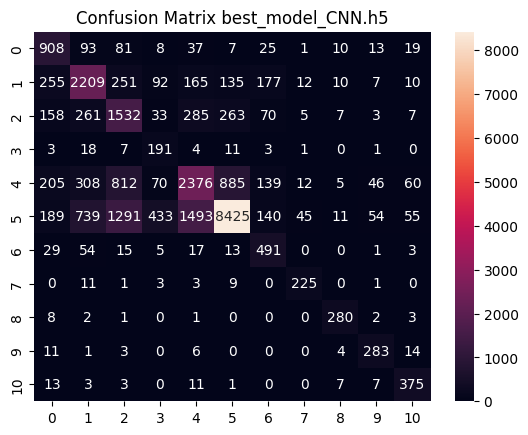

              precision    recall  f1-score   support

          AK       0.51      0.76      0.61      1202
         BCC       0.60      0.66      0.63      3323
         BKL       0.38      0.58      0.46      2624
          DF       0.23      0.80      0.36       239
         MEL       0.54      0.48      0.51      4918
          NV       0.86      0.65      0.74     12875
         SCC       0.47      0.78      0.59       628
        VASC       0.75      0.89      0.81       253
        ance       0.84      0.94      0.89       297
      eczema       0.68      0.88      0.76       322
   psoriasis       0.69      0.89      0.78       420

    accuracy                           0.64     27101
   macro avg       0.59      0.76      0.65     27101
weighted avg       0.69      0.64      0.65     27101

Found 27101 images belonging to 11 classes.
27101/27101 [==============================] - 4511s 166ms/step


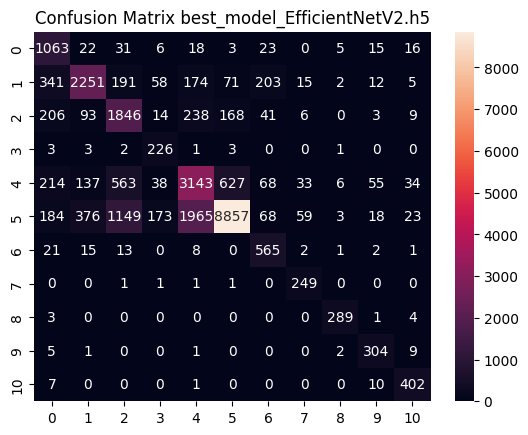

              precision    recall  f1-score   support

          AK       0.52      0.88      0.65      1202
         BCC       0.78      0.68      0.72      3323
         BKL       0.49      0.70      0.58      2624
          DF       0.44      0.95      0.60       239
         MEL       0.57      0.64      0.60      4918
          NV       0.91      0.69      0.78     12875
         SCC       0.58      0.90      0.71       628
        VASC       0.68      0.98      0.81       253
        ance       0.94      0.97      0.95       297
      eczema       0.72      0.94      0.82       322
   psoriasis       0.80      0.96      0.87       420

    accuracy                           0.71     27101
   macro avg       0.67      0.85      0.74     27101
weighted avg       0.76      0.71      0.72     27101



In [10]:
test_model('best_model_CNN.h5', 'Data')
test_model('best_model_EfficientNetV2.h5', 'Data')